In [1]:
from helpers import get_input

In [2]:
input_text, input_list = get_input()

Retrieving Url
Wrote to marcosh_input_day10.txt


## Part 1

In [1]:
df = pd.read_csv("marcosh_input_day10.txt",sep=" ",names=['a','b'])

In [2]:
def process_df(df):
    first_row = pd.DataFrame([{'a':'xxx','b':1}])
    df = pd.concat([first_row,df]).reset_index(drop=True)
    df['cycle'] = df['a'].map({'noop':1,'addx':2})
    df['b_sum'] = df['b'].fillna(0).cumsum()
    df['cycle_sum'] = df['cycle'].fillna(0).cumsum()

    return df

In [3]:
def make_reindex(df):
    df_reindex = df.set_index('cycle_sum').reindex(range(1,241),method='pad')
    return df_reindex

In [4]:
def make_dict(df):
    df_reindex = df.set_index('cycle_sum').reindex(range(1,241),method='pad')
    return df_reindex['b_sum'].to_dict()

In [5]:
df_sample = pd.read_csv("sampleDay10.txt",sep=" ",names=['a','b'])

In [6]:
df_sample = process_df(df_sample)

In [7]:
df_reindex = make_reindex(df_sample)

In [8]:
sample_dict = df_reindex['b_sum'].to_dict()

In [9]:
i = 0
for key in [20,60,100,140,180,220]:
    i += sample_dict.get(key-1) * key
i

13140.0

In [10]:
df = pd.read_csv("marcosh_input_day10.txt",sep=" ",names=['a','b'])
df = process_df(df)


In [13]:
df_reindex = make_reindex(df)
mydict = make_dict(df)

In [14]:
i = 0
for key in [20,60,100,140,180,220]:
    i += mydict.get(key-1) * key  ## blargh during vs end of cycle
i

11780.0

## Part 2

In [15]:
out = []
for i in range(0,240):
    val = mydict.get(i,0)
    if (val - 1) <= i % 40 <= (val + 1):
        out.append(1)
    else:
        out.append(0)

In [16]:
import plotly.express as px

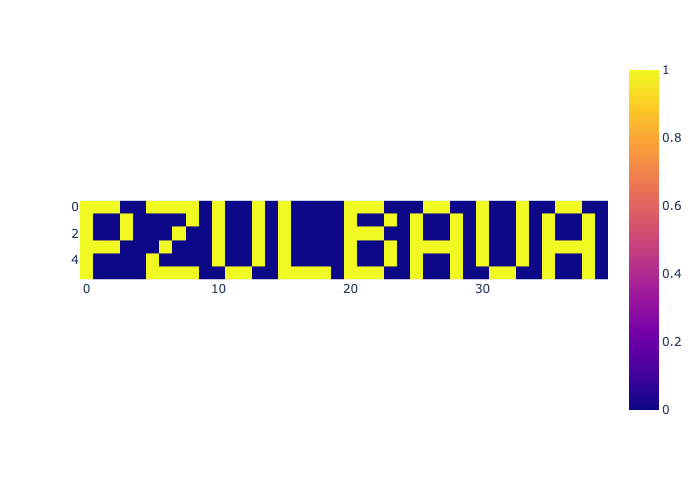

In [17]:
fig = px.imshow(np.array(out).reshape([6,40]))
fig.show(renderer='png')